<a href="https://colab.research.google.com/github/ekqlsrla/ESAA/blob/main/SESSION/0502_%ED%8F%89%EA%B0%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 모듈 및 데이터 로드 
from sklearn.datasets import load_breast_cancer 
from sklearn.linear_model import LogisticRegression 

data = load_breast_cancer() 

# x, y 데이터 생성 
X = data.data 

# 악성을 1, 양성을 0으로 
y = 1 - data.target 

# 특징으로 사용할 데이터를 평균으로 구분하는 10개 열로 축소
X = X[:, :10] 

# 로지스틱 회귀 모델 생성 
model_lor = LogisticRegression(solver = 'lbfgs') 
model_lor.fit(X,y) 
y_pred = model_lor.predict(X)

* 오차 행렬(혼동 행렬) 생성

In [ ]:
# 종속 변수와 예측 결과로 혼동 행렬 생성

from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y,y_pred)

print(confusion)


[[337  20]
 [ 30 182]]


* 정확도

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y,y_pred)

print(accuracy)

0.9121265377855887


* 정밀도

In [ ]:
from sklearn.metrics import precision_score

precision = precision_score(y,y_pred)

print(precision)

0.900990099009901


* 재현율

In [ ]:
from sklearn.metrics import recall_score

recall = recall_score(y,y_pred)

print(recall)

0.8584905660377359


* F1 score

In [ ]:
from sklearn.metrics import f1_score
f1 = f1_score(y,y_pred)

print(f1)

0.8792270531400966


* 예측 확률(pred_proba) : 0으로 예측할 확률이 0.1보다 크면 y_pred2 에 넣는다 가정.

In [ ]:
from sklearn.preprocessing import Binarizer
import numpy as np

y_pred2 = (model_lor.predict_proba(X)[:,1]>0.1).astype(np.int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


In [ ]:
#정답

from sklearn.preprocessing import Binarizer
pred_proba = model_lor.predict_proba(X)
pred_proba1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold = 0.1)
y_pred2 = binarizer.transform(pred_proba1)

In [ ]:
# y과 y_pred2의 혼동행렬, 정확도, 정밀도, 재현율, f1 score 구하기

confusion = confusion_matrix(y,y_pred2)
accuracy = accuracy_score(y,y_pred2)
precision = precision_score(y,y_pred2)
recall = recall_score(y,y_pred2)
f1 = f1_score(y,y_pred2)

print(confusion,accuracy,precision,recall,f1)

[[267  90]
 [  6 206]] 0.8312829525483304 0.6959459459459459 0.9716981132075472 0.8110236220472441


* ROC 곡선 시각화

In [ ]:
from sklearn.metrics import roc_curve 

fprs, tprs, thresholds = roc_curve(y,model_lor.predict_proba(X)[:,1])

In [ ]:
#정답
from sklearn.metrics import roc_curve
probas = model_lor.predict_proba(X)
fpr,tpr,thresholds = roc_curve(y,probas[:,1])

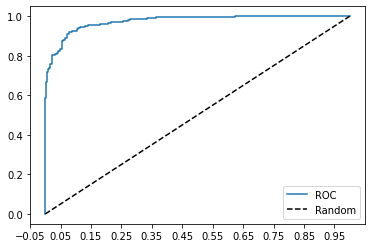

In [ ]:
import matplotlib.pyplot as plt 
import numpy as np
%matplotlib inline

plt.plot(fprs,tprs,label = 'ROC')
plt.plot([0,1],[0,1],'k--',label = 'Random')

start,end = plt.xlim()
plt.xticks(np.round(np.arange(start,end,0.1),2))
plt.legend()


* ROC AUC 값

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y,model_lor.predict_proba(X)[:,1])

0.9741557000158554

In [ ]:
roc_auc_score(y,y_pred)